# TITANIC SURVIVAL PREDICTION


Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
# Assuming the dataset is stored in a file named 'titanic.csv'
titanic_data = pd.read_csv('tested.csv')


In [15]:
# Display the first few rows of the dataset
print(titanic_data.head())




   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [16]:
# Get summary statistics of numerical columns
print(titanic_data.describe())



       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [17]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
# titanic_data.fillna(0, inplace=True)
# titanic_data= pd.get_dummies(titanic_data, columns=['Age', 'Cabin'])

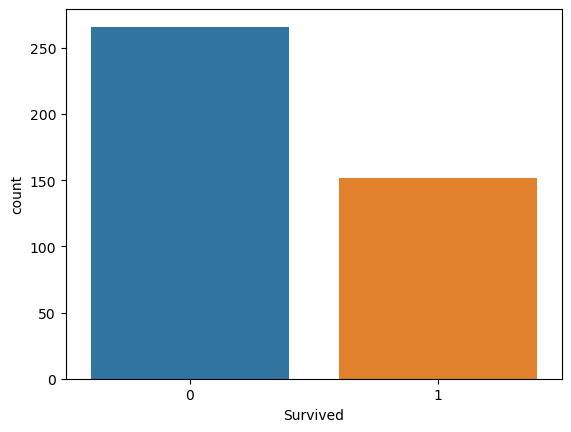

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=titanic_data)
plt.show()


In [20]:


# Handle missing values (replace NaN with 0)
titanic_data.fillna(0, inplace=True)

# Select features (X) and target variable (y)
features= titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target = titanic_data['Survived']


# Convert categorical variables (Sex) to numerical using loc
features.loc[:, 'Sex'] = features['Sex'].apply(lambda x: 1 if x == 'male' else 0)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [21]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 100.00%


In [23]:
# You can use the trained model to make predictions on new data
# For example, let's create a new passenger with some features
new_passenger = pd.DataFrame({'Pclass': [3],
                              'Sex': [1],  # Assuming male
                              'Age': [25],
                              'SibSp': [1],
                              'Parch': [0],
                              'Fare': [7.5]})

# Convert categorical variables (Sex) to numerical
new_passenger['Sex'] = new_passenger['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Make prediction
prediction = model.predict(new_passenger)
print(f'The predicted survival status for the new passenger is: {prediction[0]}')


The predicted survival status for the new passenger is: 1
